In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
#read in task df

path_task = '/Users/abbieschindler/Documents/ProgrammingFun/iPythonScripts/Med_PC/PD_task.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

task.head(10)

(3107, 18)


,date,animal,task,probability,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
0,210113,1123,PD,0,2,0,1,1,0,0.00,1,0.51,0,0.00,NaN,NaN,NaN,NaN
1,210113,1123,PD,0,2,1,1,0,1,1.01,0,0.00,0,0.00,4.0,NaN,NaN,NaN
2,210113,1123,PD,0,2,2,1,1,0,0.00,1,1.55,1,0.66,0.0,NaN,NaN,NaN
3,210113,1123,PD,0,2,3,1,0,1,0.97,0,0.00,2,0.28,2.0,NaN,NaN,NaN
4,210113,1123,PD,0,2,4,1,0,1,1.20,0,0.00,1,0.21,1.0,NaN,NaN,NaN
5,210113,1123,PD,0,2,5,1,0,1,1.38,0,0.00,2,0.09,3.0,NaN,NaN,NaN
6,210113,1123,PD,0,2,6,1,0,1,1.09,0,0.00,1,0.20,1.0,NaN,NaN,NaN
7,210113,1123,PD,0,2,7,1,1,0,0.00,1,1.51,0,0.00,3.0,NaN,NaN,NaN
8,210113,1123,PD,0,2,8,1,0,1,1.32,0,0.00,1,0.37,1.0,NaN,NaN,NaN
9,210113,1123,PD,0,2,9,1,1,0,0.00,1,0.84,0,0.00,1.0,NaN,NaN,NaN


In [3]:
path_animal_info = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/assignments/PCA_PD_DRL_210101_meta.xlsx'
   
animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

animal_info.rename(columns={"animal": "animal"}, inplace=True)
print(animal_info.shape)

animal_info.head()

(18, 4)


,cage,animal,group,lever
0,279,1116,4,1
1,279,1117,4,1
2,279,1118,4,1
3,283,1128,5,1
4,283,1130,5,1


In [4]:
df_final = (task.merge(animal_info,
                on=['animal'], how='left'))
df_final.head()

,date,animal,task,probability,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,group,lever
0,210113,1123,PD,0,2,0,1,1,0,0.00,1,0.51,0,0.00,NaN,NaN,NaN,NaN,281,4,1
1,210113,1123,PD,0,2,1,1,0,1,1.01,0,0.00,0,0.00,4.0,NaN,NaN,NaN,281,4,1
2,210113,1123,PD,0,2,2,1,1,0,0.00,1,1.55,1,0.66,0.0,NaN,NaN,NaN,281,4,1
3,210113,1123,PD,0,2,3,1,0,1,0.97,0,0.00,2,0.28,2.0,NaN,NaN,NaN,281,4,1
4,210113,1123,PD,0,2,4,1,0,1,1.20,0,0.00,1,0.21,1.0,NaN,NaN,NaN,281,4,1


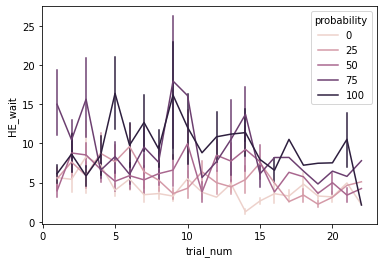

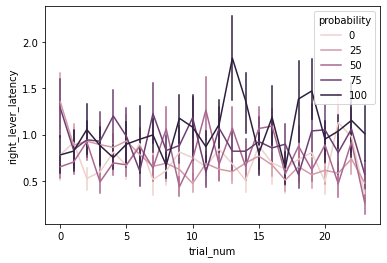

<AxesSubplot:xlabel='trial_num', ylabel='left_lever_latency'>

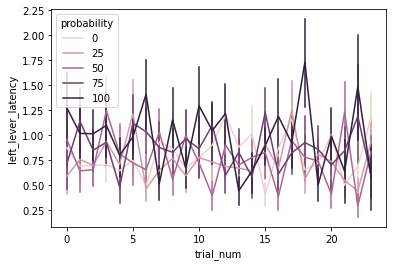

In [6]:
sns.lineplot(x='trial_num', y='HE_wait', data=task, hue='probability', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, hue='probability', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, hue='probability', err_style="bars", ci=68)

In [24]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = df_final['animal'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal'] == animal]
    
    #generate session df
    sessions = animal_data['probability'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['probability'] == session]
        
        #generate session df
        sub_sessions = animal_data_session['sub_session'].unique()
    
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['animal'] = animal_data_sub_session['animal'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['probability'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['right_lever_count'] == 1]['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['left_lever_count'] == 1]['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['left_lever_count'] == 1]['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['right_lever_count'] == 1]['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

,date,animal,group,probability,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave,high_reward_prob
0,210113,1123,4,0,2,right,11,13,1.130000,11,1.142727,54.166667
1,210113,1123,4,0,1,right,12,12,1.157500,12,1.780833,50.000000
2,210107,1123,4,100,2,right,72,16,1.136875,8,0.977500,66.666667
3,210107,1123,4,100,1,right,60,12,1.425000,12,1.816667,50.000000
4,210108,1123,4,75,2,right,63,21,1.069524,3,1.593333,87.500000


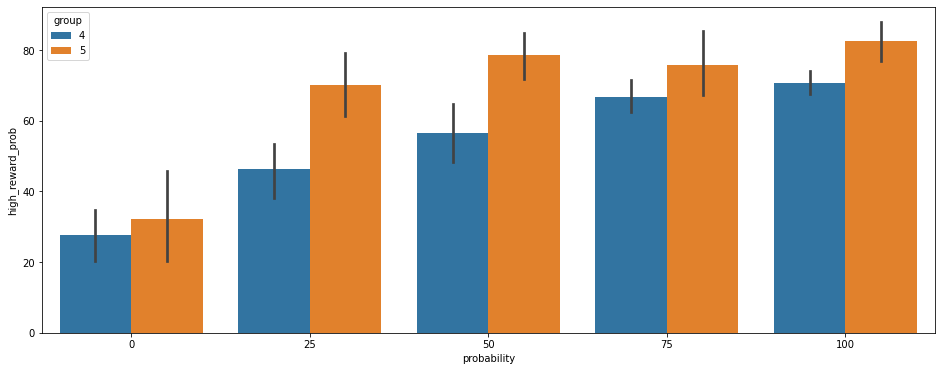

In [29]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='probability', y='high_reward_prob', data=pd_df_session[pd_df_session['sub_session'] == 2], ci=68, hue='group')

In [30]:
pd_df_session.to_csv('pd_df_session.csv')

In [32]:
choice_df = pd_df_session[pd_df_session['sub_session'] == 2]
choice_df = choice_df.drop(['date', 'sub_session'], axis=1)
choice_df.set_index(['animal', 'group', 'probability'], inplace=True)
choice_df.head()

high_reward_lever  reinforcement_count  high_reward_lever_count  high_reward_lever_latency_ave  low_reward_lever_count  low_reward_lever_latency_ave  high_reward_prob
animal group probability                                                                                                                                                                       
1123   4     0                       right                   11                       13                       1.130000                      11                      1.142727         54.166667
             100                     right                   72                       16                       1.136875                       8                      0.977500         66.666667
             75                      right                   63                       21                       1.069524                       3                      1.593333         87.500000
             25                      right                   25                       15                       1.166667                       9                      1.100000         62.500000
             50                      right                   48                       24                       0.933333                       0                           NaN        100.000000

In [33]:
choice_df = choice_df.unstack(-1)
choice_df.head()

high_reward_lever                             reinforcement_count                 high_reward_lever_count                 high_reward_lever_latency_ave                                         low_reward_lever_count                 low_reward_lever_latency_ave                                         high_reward_prob                                            
probability                0      25     50     75     100                 0   25  50  75  100                     0   25  50  75  100                           0         25        50        75        100                    0   25  50  75  100                          0         25        50        75        100              0          25         50         75         100
animal group                                                                                                                                                                                                                                                                                                                                                                         
1117   4                 right  right  right  right  right                  12  28  40  59  77                      12  10  16  16  18                      1.074167  1.048000  1.347500  1.260000  1.853333                     12  12   8   7   5                     1.080833  1.468333  1.415000  2.565714  2.752000        50.000000  45.454545  66.666667  69.565217  78.260870
1118   4                 right  right  right  right  right                  19  19  26  29  41                       5  13  10   7   9                      2.134000  1.904615  2.794000  2.617143  2.441111                     19  11   6   5   5                     1.553158  1.846364  4.741667  5.186000  5.166000        20.833333  54.166667  62.500000  58.333333  64.285714
1119   4                  left   left   left   left   left                  17  23  27  51  37                       5  10   5  15   8                      1.090000  1.055000  1.130000  1.094000  1.791250                     17  11  15   7   5                     0.874706  0.968182  0.698667  2.147143  3.444000        22.727273  47.619048  25.000000  68.181818  61.538462
1120   4                  left   left   left   left   left                  22  16  31  22  55                       0   6   9   5  12                           NaN  1.605000  1.833333  3.478000  2.606667                     22  12  11   6   7                     1.520000  1.711667  2.197273  2.408333  3.028571         0.000000  33.333333  45.000000  45.454545  63.157895
1121   4                  left   left   left   left   left                  23  23  36  39  42                       1   1  12  10  10                      1.160000  1.940000  1.440833  2.478000  2.153000                     23  23  12   7   2                     0.904783  1.036957  1.445833  2.217143  1.330000         4.166667   4.166667  50.000000  58.823529  83.333333

In [34]:
choice_df.to_csv('choice_df.csv')